In [56]:
import os
import earthpy as et
import rasterio as rio
import geopandas as gpd
import earthpy.plot as ep

import earthpy.spatial as es
import matplotlib.pyplot as plt
from glob import glob
from rasterio.plot import plotting_extent


import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
import laspy
import rasterio
from rasterio import mask
import folium

In [57]:
## Plot raster/tif image
# --------------------
def plot_raster(rast_data, title=''):
    """
    Plots raster tif image both in log scale(+1) and original verion
    """
    fig, (axlog, axorg) = plt.subplots(1, 2, figsize=(14, 7))
    im1 = axlog.imshow(np.log1p(rast_data))  # vmin=0, vmax=2.1)
#     im2 = axorg.imshow(rast_data)

    plt.title("{}".format(title), fontdict={'fontsize': 15})
    plt.axis('off')
    plt.colorbar(im1, fraction=0.03)
    plt.show()

In [58]:
# Read raster/tif file
# --------------------
iowa_tif = '../data/tif/temp.tif'
raster_iowa = rasterio.open(iowa_tif)
iowa_data = raster_iowa.read(1)


In [72]:
raster_iowa.bounds


BoundingBox(left=446112.3908587211, bottom=4652575.192733061, right=447611.3908587211, top=4654068.192733061)

In [59]:
count = iowa_data[iowa_data > 0].sum()
count

630595565.2288889

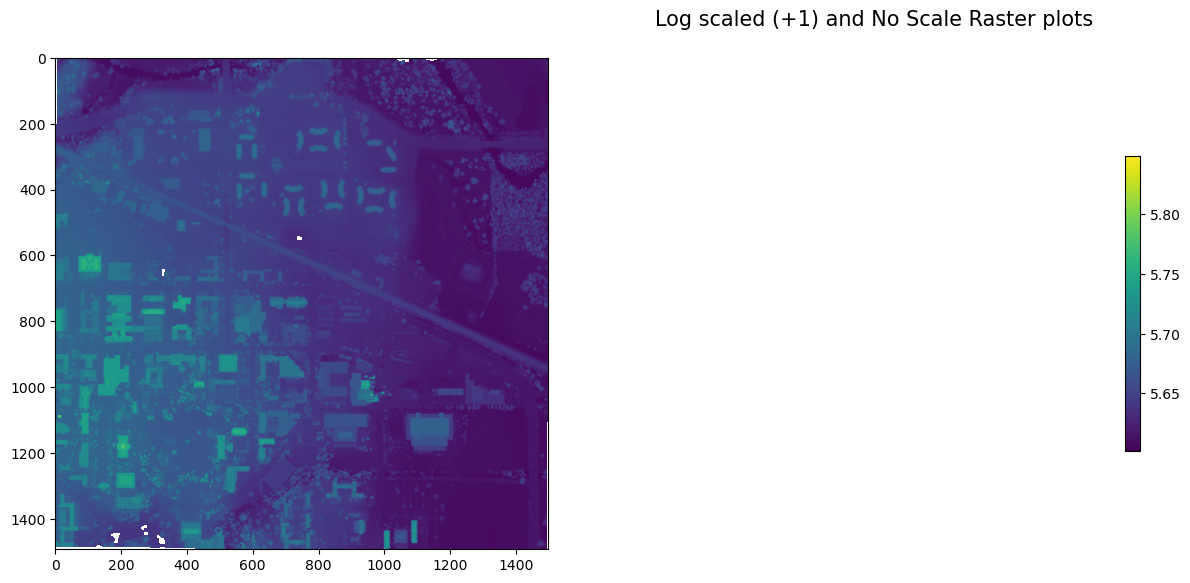

In [61]:
title = 'Log scaled (+1) and No Scale Raster plots'.format(count)
plot_raster(iowa_data, title)

In [66]:
# Read raster/tif file
# --------------------
SoPlatteRiver_tif = '../data/tif/SoPlatteRiver.tif'
raster_SoPlatteRiver = rasterio.open(SoPlatteRiver_tif)
SoPlatteRiver_data = raster_SoPlatteRiver.read(1)


In [68]:
count = SoPlatteRiver_data[SoPlatteRiver_data > 0].sum()
count

7556969977.076723

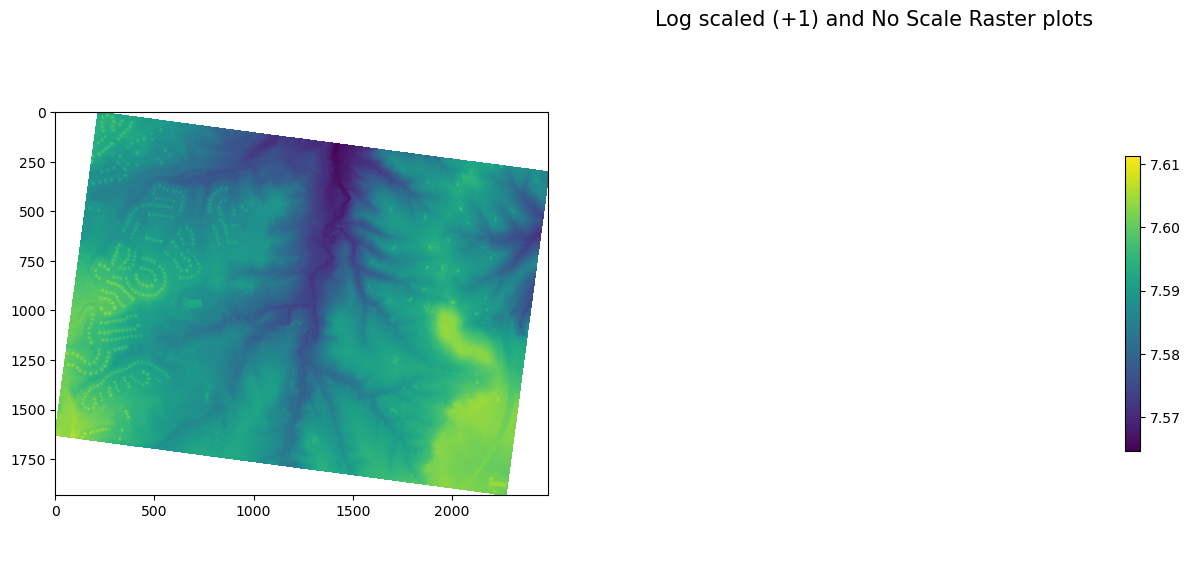

In [69]:
title = 'Log scaled (+1) and No Scale Raster plots'.format(count)
plot_raster(SoPlatteRiver_data, title)

In [19]:
# get shp from tif
from glob import glob


def get_shp_from_tif(tif_path: str, shp_file_path: str) -> None:
    raster = rasterio.open(tif_path)
    bounds = raster.bounds

    df = gpd.GeoDataFrame({"id": 1, "geometry": [box(*bounds)]})

    # save to file
    df.to_file(shp_file_path)
    print('Saved..')


In [20]:
tiffs = glob("../data/tif/*.tif")

tiffs.sort()

l = []

for i in tiffs:
    with rasterio.open(i, 'r', masked=True) as f:
        l.append(f.read(1))

arr_st = np.hstack(l[1:])

In [24]:
arr_st.shape

(1493, 1499)

In [26]:
from shapely.geometry import box
get_shp_from_tif('../data/tif/temp.tif', shp_file_path='../data/shp/temp.shp')

Saved..


In [27]:
shps = glob('../data/shp/*.shp')
shps.sort()
shapefiles = []
for i in shps:
    usa_gdf = (gpd.GeoDataFrame.from_file(i))

In [28]:
usa_gdf.shape

(1, 2)

In [29]:
usa_gdf

,id,geometry
0,1,"POLYGON ((447611.391 4652575.193, 446112.391 4..."


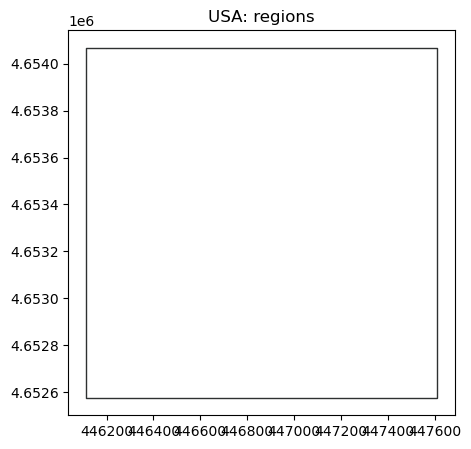

In [33]:
# plot the shapefile
plt.rcParams['figure.figsize'] = 10, 5
usa_gdf.plot(color="white", edgecolor="#2e3131", figsize=(10, 5))
plt.title('USA: regions')
plt.show()

In [34]:
usa_gdf['area'] = usa_gdf.area
# Returns a GeoSeries of points for each geometric centroid.
usa_gdf['centroid'] = usa_gdf.centroid
# Returns a GeoSeries of geometries representing the point or smallest rectangular
# polygon (with sides parallel to the coordinate axes) that contains each object.
usa_gdf['envelope'] = usa_gdf.envelope

In [35]:
print(usa_gdf.crs)


None


In [24]:
usa_g


,id,geometry,area
0,1,"POLYGON ((447611.391 4652575.193, 446112.391 4...",2238007.0


In [36]:
usa_g = usa_gdf.drop(['centroid', 'envelope'], axis=1)

In [38]:
# Estimate centroids of the country
# --------------------
cent_x = usa_gdf['geometry'].centroid.x.mean()
cent_y = usa_gdf['geometry'].centroid.y.mean()

# Create a map object using Folium
# --------------------
map_usa = folium.Map(location=[cent_y, cent_x], zoom_start=7, tiles='OpenStreetMap')

# Create the choropleth map
# --------------------
choro = folium.Choropleth(geo_data=usa_g,
                          name='choropleth',
                          data=usa_g,
                          columns=['NAME_2', 'area'],
                          #                           key_on='feature.NAME_2',
                          fill_color='YlOrRd',
                          fill_opacity=0.6,
                          line_opacity=0.8,
                          legend_name="Area size across USA's subregion"
                          ).add_to(map_usa)

# add labels to map
choro.geojson.add_child(folium.features.GeoJsonTooltip(fields=['NAME_2', 'area'],
                                                       aliases=['County', 'Mass'],
                                                       labels=False))
folium.LayerControl().add_to(map_usa)


map_usa

KeyError: "None of ['NAME_2'] are in the columns"

In [ ]:
# Estimate centroids of the country
# --------------------
cent_x = usa_gdf['geometry'].centroid.x.mean()
cent_y = usa_gdf['geometry'].centroid.y.mean()

# Create a map object using Folium
# --------------------
map_usa = folium.Map(location=[cent_y, cent_x], zoom_start=7, tiles='OpenStreetMap')

# Create the choropleth map
# --------------------
choro = folium.Choropleth(geo_data=usa_g,
                          name='choropleth',
                          data=usa_g,
                          columns=['NAME_2', 'area'],
                          #                           key_on='feature.NAME_2',
                          fill_color='YlOrRd',
                          fill_opacity=0.6,
                          line_opacity=0.8,
                          legend_name="Area size across USA's subregion"
                          ).add_to(map_usa)

# add labels to map
choro.geojson.add_child(folium.features.GeoJsonTooltip(fields=['NAME_2', 'area'],
                                                       aliases=['County', 'Mass'],
                                                       labels=True))
folium.LayerControl().add_to(map_usa)


map_usa